# Building a Soft Sensor for Detection of Abnormal EKG Signals Using Wavelet Noise Reduction and Machine Learning
## By: Clay Elmore and Claire Lo

### A Note on Package Installation:
The following python 3 packages must be installed for the code in this notebook to run. The URL's for each package are shown as well.

PyWavelets: https://pywavelets.readthedocs.io/en/latest/#

MatPlotLib: https://matplotlib.org/

scikit-learn: http://scikit-learn.org/stable/

NumPy: http://www.numpy.org/

WFDB: https://www.physionet.org/physiotools/wfdb.shtml

### WARNING 1: This code was created on a MacBook; running this code on a non-UNIX operating system could cause issues
### WARNING 2: In order to avoid object-oriented memory issues, restart the kernel and run all cells at once when testing the code. 

## Section 1: Problem Statement

   In 2015 the leading cause of death in the United States was related to heart disease [1]. Diagnosing heart disease is done mainly through two tests, an echocardiogram (ECG) and an electrocardiogram (EKG). An ECG provides insight into the internal structure of the heart. An EKG, moreover, measures the electrical efficiency of the heart and enables a measurement of the time dependent electrical pattern of the heart rhythm. Currently, in the hospital, autonomated computerized algorithms track continuous, real time EKG readings, alerting nurses and physicians via alarms when detecting an issue. However, these systems have not acheived an accuracy that eliminates the need for human review of the same signals, often requiring hospitals to desigante a monitor watcher of the EKG rhythms. Designing a complex algorithm that can accuratly detect and predict cardiac events would eliminate the need for a dedicated monitor watcher of continuous stream of data[2]. Elimination of a monitor watcher through a accurate and autonomic computerized systems for classifying EKG outputs offers not only an economic reprieve but also the potential for a decrease in cardiac event mortality rates. 
   
   EKG results are a combination of multiple wave signals, which are combine to create the classification characteristics of the EKG. One important section of the EKG is the QRS segment[3]. Obtaining the important measurements of a QRS segment, is often difficult for machine algorithms, because they are often buried in noise. Analyzing an accurately identified QRS segment can be vital to alerting doctors that a patient’s heart is acting abnormally. Wavelets have been shown to be a great way to reduce noise in signals ranging from various biomedical imaging to the JPEG 2000 algorithm [4]. The technology challenge is the application of the powerful mathematical tool that is a wavelet to EKG data in order to accurately identify a QRS complex in spite of all of the noise in an EKG signal. Wavelets have previously been shown to be able to decompose a QRS into a time-domain consistent signal through multiple level decomposition [5]. This decomposition could yield key insights into heartbeat abnormalities if used correctly. 
   
   The challenge that comes with using a wavelet decomposition to find heartbeat abnormalities is the machine learning aspect of the problem. A sample set of EKG measurements will need to be used in order to develop a primary algorithm that detects abnormalities. This algorithm would then be applied to new data. In a real world scenario, each new set of data would be incorporated into the primary test data in order to constantly improve the algorithm’s ability to detect abnormalities. However, that technological advancement is outside the scope of this project, so the primary test data will be the only learning used to build the algorithm. In other words, this algorithm will be static, not dynamic.
    
   The ultimate goal of this project is to design a wavelet based process control algorithm that can detect abonormal QRS signals in order that they can alert doctors to potentially life threatening electrical activity even in the presence of signigicant EKG noise. The process will input noisy EKG signals, compute a wavelet decomposition, process the decomposition and classify the signal as healthy or unhealthy. Mulitple wavelet decompostions with various types of machine learning algorithms to determine will be tested to determine combination of wavelet and machine learning best detects abnormal EKG signals. 
     
   


###### _Sources:_
[1] Murphy SL, Xu JQ, Kochanek KD, Curtin SC, Arias E. “Deaths: Final data for 2015.” National Vital Statistics Reports; vol 66 no 6. Hyattsville, MD: National Center for Health Statistics. 2017.

[2] Drew, Barbara J., Robert M. Califf, Marjorie Funk, Elizabeth S. Kaufman, Mitchell W. Krucoff, Michael M. Laks, Peter W. Macfarlane, Claire Sommargren, Steven Swiryn, and George F. Van Hare. "Practice Standards for Electrocardiographic Monitoring in Hospital Settings." Circulation. October 3, 2017. Accessed April 20, 2018. http://circ.ahajournals.org/content/110/17/2721#sec-75

[3] American Heart Association. “Echocardiogram - Echo.” July 2015. Accessed March 20, 2018. http://www.heart.org/HEARTORG/Conditions/HeartAttack/DiagnosingaHeartAttack/Echocardiogram---Echo_UCM_451485_Article.jsp#.WrFFJ5Pwbox.

[4] Unser, M., and A. Aldroubi. "A Review of Wavelets in Biomedical Applications." Proceedings of the IEEE 84, no. 4 (1996): 626-38.

[5] Senhadji, L., G. Carrault, J.j. Bellanger, and G. Passariello. "Comparing Wavelet Transforms for Recognizing Cardiac Patterns." IEEE Engineering in Medicine and Biology Magazine 14, no. 2 (1995): 167-73.


## Section 2: Theoretical Development

### What is a Wavelet?



Just like a DFT, a discrete wavelet transform (DWT), is just a linear transformation taking a signal from its original basis to a new, more useful, linear span. A wavelet transform separates a signal (x) into two separate vectors, a signal and a detail (s and d). This is done through matrix multiplication as shown in Equation 1 where Ta is the matrix multiplied to the signal in order to produce the signal and the detail. Note, vectors are all given the simple arrow above them and matrices are given a tilde above their symbol. 

<img src="EQN1.png" alt="Drawing" style="width: 150px;"/>    

The simplest wavelet transform is the Haar DWT. The Haar DWT splits the x signal into a moving average signal (s) and a difference from this average (d). This works by a series of matrix multiplications via upper triangular (U), lower triangular(P), and normalization matrices (D), These three matrices are all 2 by 2 block matrices made up of scalars, an even and odd entry separation matrix called _split_, and identity matrices (I). For the Haar DWT, Equation 2 gives the equation used to determine Ta.

<img src="EQN2.png" alt="Drawing" style="width: 500px;"/>

On the opposite end, the inverse of the wavelet transform will take a vector made of the signal and detail and transform it back into the original signal. For the Haar transform, the inverse of Ta (Ts) is given by Equation 3. Note that the inverse of _split_ is _merge_.

<img src="EQN3.png" alt="Drawing" style="width: 420px;"/>


However, the Haar transform is a somewhat primitive method for performing DWT’s as it does not return and orthonormal basis set in Ta. Furthermore, Haar DWT’s have trouble detecting discontinuities in signals. Another DWT will be analyzed in this project. The equations for the Daubechies 4 wavelet is given below.  Note that S is a matrix that shifts a vector’s values one position and wraps the last value around to be the first value.

<img src="EQN4.png" alt="Drawing" style="width: 500px;"/>


Equations 1-4 give equations for level 1 DWT’s, but it is much more powerful to use multi-scale transforms. This occurs were a DWT is the applied to the signal vector part of the y vector. Multi-scale DWT’s are given the notation as in Equation 5. Note that the signal and detail vectors are referred to as the level 1, and level 2 details respectively.

<img src="EQN5.png" alt="Drawing" style="width: 450px;"/>

The most common analysis method used with wavelets is called thresholding. This is where detail values below a certain level are discarded, making a new, modified, y vector which can then be multiplied by Ts (the transpose of Ta) to obtain a compressed signal of x.

_Note: Wavelet theory was developed with the help of “Discrete Fourier and Wavelet Transforms” by Dr. Roe W. Goodman [1]. _



### Biological Background

The body communicates with itself through electrical signals that are created through an imbalance of ions across cell membranes. Measuring these electrical signals gives physicians crucial insight into body which allows for diagnosis of disease on a fundamental level. In an electrocardiogram (EKG) the electrical signals in the heart are measured using a set of ten electrodes and electrocardiograph to amplify the measured potentials. These electrodes are placed on the limbs and across the chest and work together in pairs electrode to create twelve leads, or perspectives on the hearts electrical activity [2]. The theoretical line connecting the pairs of electrodes forms the lead axis. Additionally, the electrode pairs work in reference to a third reference electrode, located on the right leg, that is arbitrarily taken as the zero potential [3]. The twelve perspectives occur in two planes: a frontal plane with anterior to posterior view of the hearts electrical activity and a horizontal plane with an inferior to superior view [3]. The output from the EKG is a patterned line graph of measured voltage representative of the depolarization and repolarization of the heart muscle versus time. Electrical activity towards the positive electrode or away from a negative electrode causes an upward deflection in the graph.

In a normal sinus rhythm (NSR), the electrical signal in the heart starts with depolarization of the pacemaker cells in the sinoatrial node (SAN). A depolarization wave then travels to the atrioventricular node (AVN), causing the depolarization and subsequent contraction of the heart’s atria. The wave of depolarization continues from the AVN through the bundle of His. At the bundle of His, the depolarization splits into two paths and travels to the base of the heart then to the Purkinje System and eventually to the ventricular walls causing a ventricular contraction [3]. The ventricular contraction occurs through the activation of three muscles, the interventricular septum, the right and left ventricular free walls, and then remaining small areas of the ventricles located at the base of the heart. After the depolarization, the heart muscles, the muscle must repolarize before it can depolarize beforw the next cardiac cycle can occur. 

An EKG readout is broken into three sections, the depolarization of the atria, depolarization of the ventricles, and the repolarization of the ventricles (Figure 1). The depolarization of the atria is depicted as a P-wave on an EKG readout. Typically, the P-wave is an upward-rounded deflection lasting 0.06-0.12 seconds [4]. The absence or large variance in the presence P-waves in the data indicates the depolarization of the heart originates in a place other than the SA node, like in the ventricles, and represents an atrial fibrillation. Other abnormities in P-waves, such as having peaked and enlarged waves, indicate diseases such as heart failure and atrial hypertrophy. The time between P-waves in consecutive cardiac cycles represents an atrial rhythm and should have little variation. The time length of the atrial depolarization is measured as the PR-interval, the time between start of the P-wave to the start of the QRS complex. A PR-interval is dependent on the age of the patient, but for an adult is typically between 0.12-0.20 seconds. Short PR-intervals also indicates the depolarization of the heart is occurring outside of the SA node and suggests a preexcitation syndrome and/or a junctional arrhythmia [4]. A PR-interval is greater than 0.20 seconds advocates for conduction tissue disease or ischemia (inadequate blood supply to the heart).

<img src="EKGSIG.png" alt="Drawing" style="width: 350px;"/>

<p style="text-align: center;"> _Figure 1. An EKG readout of a single cardiac cycle. [1]_

<p style="text-align: left;">
The second section of the EKG readout contains the QRS complex. The QRS complex consists of three separate waves, Q, R, and S-waves. The combination of these waves depict the depolarization of the ventricles. The Q-wave is a downward deflection representing the activation of the interventricular septum [3]. The R-wave, occurs via the depolarization of the right and left ventricle free walls and is depicted as an upward deflection. The R-wave, the largest of the three waves, represents the depolarization of the largest amount of ventricular mass. Often the R-wave relates to breathing rates; the time between consecutive R-waves in consecutive cardiac cycles represents a ventricular rhythm and should have little variation. However, variations up to 0.04 seconds in the ventricular rhythm are considered normal. Lastly, the S-wave depicts the depolarization of the remaining ventricle muscles at the base of the heart. It is normal for QRS complex to not contain all three waves (Figure 2a). Occasionally, a second, distinct R-wave, often labeled as R’, will appear in the QRS complex (Figure 2b). A QRS interval, measured from the start to end of the QRS complex QRS signal will last 0.06 to 0.10 seconds in length or half of the PR-interval in an NSR. A signal lasting longer than 0.12 seconds suggests a ventricular conduction delay. Abnormalities in the Q wave indicate myocardial infarctions (heart attacks) [3]. In a myocardial infarction, the Q wave is both deepened and widened. Numerically, the Q wave is greater than 25% of the R-wave amplitude and lasts for longer than 0.04 seconds when a myocardial infarction has occurred. Additionally, the R-wave can have two peaks in the same deflection, a pattern that is termed a notched R-wave (Figure 2c). A notched R-wave suggests a bundle branch block may be occurring.

<img src="Waves.png" alt="Drawing" style="width: 450px;"/>

<p style="text-align: center;"> _Figure 2: Examples of different potential normaland abnormal of QRS signals. 
a. QRS signal without all three QRS waves b. an extra R wave peak in the QRS signal. c. a notched R wave [4]._


<p style="text-align: left;"> The third section of EKG readout contains the T-wave, a representation of the electrical activity associated with the repolarization of the heart muscles between cardiac cycles. Normally the T-wave looks similar to a normal P-wave—an upward-rounded deflection. Sometimes the P-wave for the next cardiac cycle will nest itself in the T-wave, as a result the T-wave will appear bumpy. Moreover, a pointed T-wave is indicative of myocardial injury or hyperkalemia and, in adults, pericarditis [5]. The time scale of the T-wave is broken into two separate time intervals, an ST segment and a QT interval (Figure 1). The ST segments measures a period of zero polarization between the end to the S-wave to the start of the T-wave. An abnormal ST-segment is categorized as either depressed or elevated. A depressed segment will appear 0.5 mm below the baseline on the EKG readout. The elevated segment, moreover, will have an ST-segment 1 mm above the base-line, zero-potential. The QT interval represents the time between the start of the QRS wave to the end of the T-wave. The QT interval usually ranges from 0.36-0.44 seconds but is dependent on the patient. A more general rule of thumb is that the QT interval should not be longer than half the time between consecutive R-wave peaks [4].
The analysis of an EKG readout depends greatly on the ability to distinguish between the peaks in the various section of the EKG. Running a DWT, as described in the above section, on the EKG data allows for a more complete automated analysis of the EKG data.



### Machine Learning

Now that EKG’s and wavelets have been explained, the technology that will make this project tick, machine learning, needs to be discussed as well. The type of machine learning that will be employed in this scenario is called “Supervised Learning”. This is a type of learning in which a set of labeled “training data” is given to an algorithm in order to try and discern different groups based on the characteristics in the training data. The data is said to be labeled because there is a set of known outcomes in the training set. In this example, it is known whether the EKG signal is from a healthy or an unhealthy heart, and it is passed into an algorithm in order to form a model applicable to new signals. These new signals are called the “test set” or “learning set”. This is the set of signals that has an unknown type, and the machine learning algorithm then tried to determine what type the signal is based on the training set data [6]. In this example, the learning set will be a number of EKG signals that are either from healthy or unhealthy patients, but they are not labeled. The algorithm will then send back a response of whether the EKG matches the traits that are characteristic of a healthy or unhealthy heart. 
	Supervised learning has many different specific algorithms that can be used in order to derive a model for how to sort new data. Three main algorithms will be tested in this project: logistic regression, n-nearest neighbor, naïve Bayes, and decision trees. These can all be very complex algorithms, so a small description of the basics of each one are given below [6].


#### Logistic Regression

This is an algorithm which uses linear modeling in order to split data into two sets. This is done by fitting the training data to a logistic curve which provides a probability density function for a new single test to either be in one category or another. In this project’s case, different traits of the signals would be fit to logistic curves, then the unknown signal’s traits would be tested on each of these curves in order to give a probability of which type of heart the signal was from. Figure 3 illustrates how logistic modeling allows for a model to be implemented.

<img src="LogisticR.jpg" alt="Drawing" style="width: 450px;"/>

<p style="text-align: center;"> _Figure 3. A logistic regression of two-type data used in logistic machine learning [7]._


<p style="text-align: left;">




#### N-Nearest Neighbor
The nearest neighbor algorithm is probably the simplest machine learning algorithm for supervised learning. This algorithm plots the training set on a “map” then places the test sample on the map and calculates the Euclidean distance from always from the nearest training points on the map which allows for an estimate of the type of data that the test sample is. Figure 4 shows a good visual representation of how this algorithm creates a map for different types of data based on the training set.

<img src="NearestN.png" alt="Drawing" style="width: 350px;"/>

<p style="text-align: center;"> _Figure 4. An illustration of how to classify data using the nearest neighbor algorithm [8]._


<p style="text-align: left;">


#### Naïve Bayes

Naïve Bayes algorithm takes an independent probability approach to sorting data. The algorithm is considered “naïve” because it assumes that all features in a set are independent, thus providing the same weight to the overall outcome. For example, in EKG signals, Naïve Bayes would place the same amount of emphasis on the heart rate and fluctuations in heart rate for determining if a heart was healthy or not. It is obvious that fluctuation in heart rate is much more dangerous than a fast heart rate, so Naïve Bayes may not work well in this case. However, it has been shown to perform well in many real-world applications and is therefore worth trying. 

#### Decision Trees
Decision trees are a broader type of algorithm which uses the training data to devise a logical stepwise rule system which will lead to the correct classification of a test sample. This algorithm is simple and effective if the training data is reasonably stable. This lends it to most likely be a good contender for an algorithm that will be able to sort EKG signals. Figure 5 shows what a sample decision tree might look like. 

<img src="DecisionT.png" alt="Drawing" style="width: 350px;"/>

<p style="text-align: center;"> _Figure 5. An example of a decision tree used to classify simple death rates in a population [9]._


<p style="text-align: left;">


_Sources:_

[1] Goodman, Roe. “Discrete Fourier and Wavelet Transforms”. 2016.

[2] Ashley, Euan A. "Conquering the ECG." Cardiology Explained. January 01, 1970. Accessed April 05, 2018. https://www.ncbi.nlm.nih.gov/books/NBK2214/.

[3] McGill. "The McGill Physiology Virtual Lab." Cardiovascular Lab: Electrocardiogram: Basics. Accessed April 05, 2018. http://www.medicine.mcgill.ca/physio/vlab/cardio/ECGbasics.htm.

[4] Coviello, Jessica Shank. ECG Interpretation Made Incredibly Easy!: Pocket Guide. Philadelphia: Wolters Kluwer, 2017.

[5] Rawshani, Araz. "ECG Interpretation: Characteristics of the Normal ECG (P-wave, QRS Complex, ST Segment, T-wave) – ECG Learning." ECG Learning. March 17, 2018. Accessed April 05, 2018. https://ecgwaves.com/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/.

[6] “Supervised Learning” Scikit Learn. Accessed April 01, 2018. http://scikit-learn.org/stable/supervised_learning.html

[7] https://helloacm.com/wp-content/uploads/2016/03/logistic-regression-example.jpg Accessed April 04, 2018. 

[8] https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/09/k-Nearest-Neighbors-algorithm.png Accessed April 04, 2018.

[9] https://cdn-images-1.medium.com/max/1200/1*XMId5sJqPtm8-RIwVVz2tg.png Accessed April 04, 2018.


# Section 3/4: Results and Code Execution
#### Note: This whole project was developed as an object oriented code that can be accesed by "import EKG_machine_project.data_hold". The overall code that performs the real calculations can be found in the EKG_machine_project.py document. 

## Example of a healthy EKG signal with and without wavelet analysis 
#### The two plots below show modified EKG's. One with all detail sections zeroed out except the smallest scale detail (detail enhancement) and another with thresholding done to it at a 25% of the normalization level.

In [1]:
from EKG_project_machine import data_hold

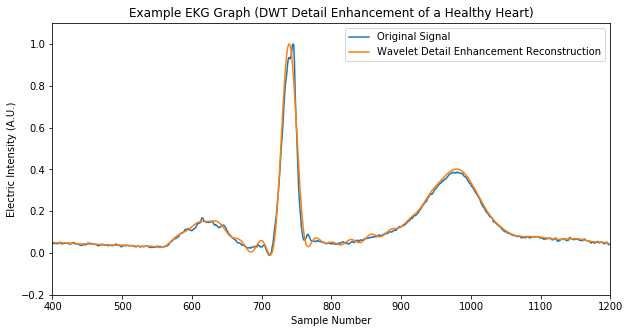

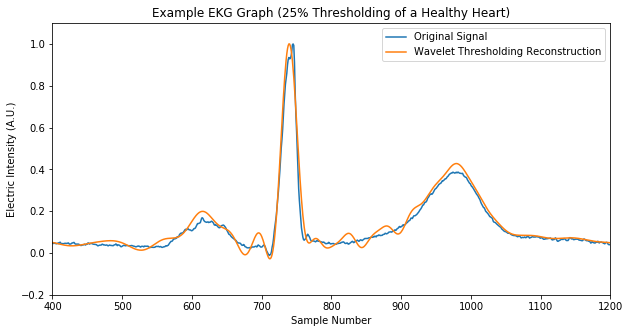

In [2]:
# basic imports
%matplotlib inline
from EKG_project_machine import data_hold
import matplotlib.pyplot as plt

# base running values
threshold = 0.25 # no thresholding was done in the example
log_two = 12 # number of points that will be used
dwt_scale = 5 # scale of the wavelet transform
wavelet = 'db38' # the wavelet transform that will be used 
peak = 0.6 # the height of a signal that will be considered a beat
single_detail = 1 # detail enhancement number that will be used

# initiallizes the object to hold the data and run calculations on the data
ekg = data_hold()
# does the data mining
ekg.get_data(samps = log_two)
# performs the wavelet decomposition
ekg.dwt_analysis(scale = dwt_scale, wavelet = wavelet)
# performs a detail enhancement wavelet modification
ekg.dwt_mod_single(single_detail)

# example raw data
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(ekg.data_train[10])

# reconstructs the signal with the modified wavelet
ekg.dwt_synthesis(wavelet = wavelet)

# example wavelet modified signal
plt.plot(ekg.data_train[10])
plt.axis([400,1200,-.2,1.1])
plt.title('Example EKG Graph (DWT Detail Enhancement of a Healthy Heart)')
plt.legend(['Original Signal','Wavelet Detail Enhancement Reconstruction'])
plt.xlabel('Sample Number')
plt.ylabel('Electric Intensity (A.U.)')
plt.show()

ekg1 = data_hold()
ekg1.get_data(samps = log_two)
ekg1.dwt_analysis(scale = dwt_scale, wavelet = wavelet)
# performs a thresholding wavelet modification
ekg1.dwt_mod_noise(threshold)

# example raw data
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(ekg1.data_train[10])

# reconstructs the signal with the modified wavelet
ekg1.dwt_synthesis(wavelet = wavelet)

# example wavelet modified signal
plt.plot(ekg1.data_train[10])
plt.axis([400,1200,-.2,1.1])
plt.title('Example EKG Graph (25% Thresholding of a Healthy Heart)')
plt.legend(['Original Signal','Wavelet Thresholding Reconstruction'])
plt.xlabel('Sample Number')
plt.ylabel('Electric Intensity (A.U.)')
plt.show()

#### Note the reconstructed signals are not perfect by any means, but the reconstructed signal has much more prominent features as opposed to the original signal. This allows for easier extraction of imporant characteristics in the modified signal. Also note that the detail enhancement does a better job of reconstructing the signal than the thresholding method.
## Feature Extraction
#### This section will give an example the five different features being extracted from the raw data. The four features are 1) heart rate 2) heart rate steadiness 3) normalization to positive or negative values and 4) QR height ratio. 

In [3]:
# base running values
peak = 0.6
array_size = 8

# basic commands for running the object oriented code
ekg_feat = data_hold() 
ekg_feat.get_data(samps = log_two) # mines data  
ekg_feat.get_heart_rate(log_two,peak) # calculates heart rate, steadiness, and normalization
ekg_feat.get_q_r_ratio(array_size)

# Show an example of a healthy and unhealthy feature list:
heart = 10
print('--------------- Example Healthy Heart Features ---------------')
if ekg_feat.type_train[heart] == 1:
    print('Data is confirmed to be stored as healthy')
a = ekg_feat.heart_rate_train[heart]
print('Heart Rate:',a,'bpm')
a = ekg_feat.steady_train[heart]
print('Steadiness:',a)
a = ekg_feat.qr_ratio_train[heart]
print('QR height ratio:',a)
a = ekg_feat.top_or_bottom_train[heart]
if a == 1:
    print('Normalization: Positive (1)')
else:
    print('Normalization: Negative (-1)')
print('--------------------------------------------------------------')
    
heart = 79
print('')
print('-------------- Example Unhealthy Heart Features --------------')
if ekg_feat.type_train[heart] == 0:
    print('Data is confirmed to be stored as unhealthy')
a = ekg_feat.heart_rate_train[heart]
print('Heart Rate:',a,'bpm')
a = ekg_feat.steady_train[heart]
print('Steadiness:',a)
a = ekg_feat.qr_ratio_train[heart]
print('QR height ratio:',a)
a = ekg_feat.top_or_bottom_train[heart]
if a == 1:
    print('Normalization: Positive (1)')
else:
    print('Normalization: Negative (-1)')
print('--------------------------------------------------------------')

--------------- Example Healthy Heart Features ---------------
Data is confirmed to be stored as healthy
Heart Rate: 73.2421875 bpm
Steadiness: 0.01392
QR height ratio: 19.1078431373
Normalization: Positive (1)
--------------------------------------------------------------

-------------- Example Unhealthy Heart Features --------------
Data is confirmed to be stored as unhealthy
Heart Rate: 29.296875 bpm
Steadiness: 0.271
QR height ratio: -57.3163513759
Normalization: Positive (1)
--------------------------------------------------------------


## Example Running of the Machine Learning Algorithm

#### Using the features that were extracted in the above section, section will run the machine learning algorithm that was developed for the nearest - neighbor method to give an example of running the machine learning aspect of the code. The number of neighbors was defined arbitrarily as 4 in this case. Note the overall efficiency of the system is defined as 100*(1-([% type i] + [% type ii]) / [% perfect sorts])

In [4]:
# run the machine learning
ekg_feat.set_up_machine_learn()
ekg_feat.machine_learn_N_neighbors(2)

# analyze the results by counting the things it got correct and incorrect
count = 0
death_count = 0 
happy_count = 0
missfire_count = 0
for i in range(len(ekg_feat.type_learn)):
    count += 1
    if ekg_feat.predict1[i] == ekg_feat.type_learn[i]:
        happy_count +=1
    elif ekg_feat.predict1[i] == 1 and ekg_feat.type_learn[i] == 0:
        death_count += 1
    elif ekg_feat.predict1[i] == 0 and ekg_feat.type_learn[i] == 1:
        missfire_count +=1

percent_dead = death_count / count
percent_miss = missfire_count / count
percent_perfect = happy_count / count
print('-------- Machine Learning Test ---------')
print('')
print('Heart Signals in Training Set: ',len(ekg_feat.data_train))
print('Heart Signals in Learning Set: ',len(ekg_feat.data_learn))
print('')
print('Type I Error: '+str(round(percent_dead*100,2))+'%')
print('Type II Error: '+str(round(percent_miss*100,2))+'%')
print('Percent Perfect: '+str(round(percent_perfect*100,2))+'%')
print('')
def effic(percent_dead,percent_miss,percent_perfect):
    return(1-(percent_miss+percent_dead)/percent_perfect)*100
efficiency = effic(percent_dead,percent_miss,percent_perfect)
print('Overal Efficiency: '+str(round(efficiency,2))+'%')
print('----------------------------------------')

-------- Machine Learning Test ---------

Heart Signals in Training Set:  84
Heart Signals in Learning Set:  96

Type I Error: 7.29%
Type II Error: 25.0%
Percent Perfect: 67.71%

Overal Efficiency: 52.31%
----------------------------------------


## Algorithm Testing
### Fair Warning: Some of these testing sections will take a while to run as it is does a lot of processing to process the wavelets when trying to optimize the wavelet reconstruction to use. 
#### This section will test the effectiveness of the four different algorithms programmed into the code. 1) N-Nearest Neighbors 2) Logistic Regression 3) Naive Bayes 4) Decision Trees

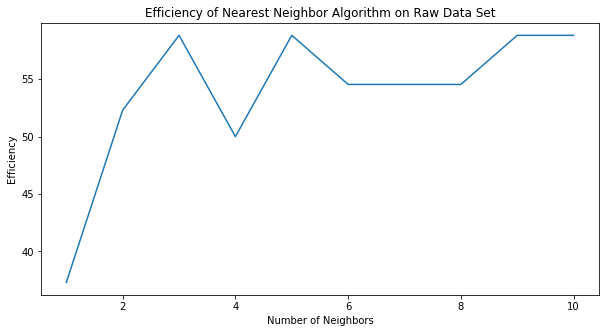

----------- Decision Tree Test ------------

Overal Efficiency: 56.72

-------------------------------------------

------------ Naive Bayes Test -------------

Overal Efficiency: 22.22

-------------------------------------------

-------- Logistic Regression Test ---------

Overal Efficiency: 37.29

-------------------------------------------


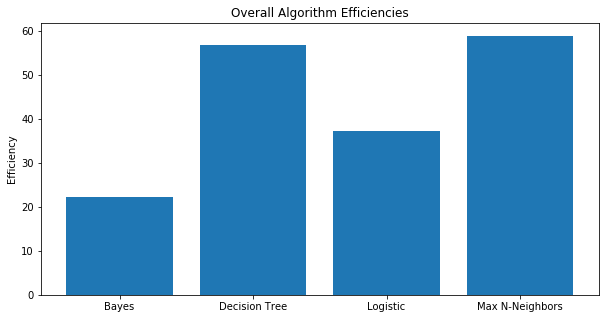

In [5]:
# nearest neighbor testing
log_two = 12
peak = 0.6
array_size = 8

neighbors = range(1,11)
eff_array = []

for i in neighbors:
    ekg_feat.machine_learn_N_neighbors(i)

    # analyze the results by counting the things it got correct and incorrect
    count = 0
    death_count = 0 
    happy_count = 0
    missfire_count = 0
    for i in range(len(ekg_feat.type_learn)):
        count += 1
        if ekg_feat.predict1[i] == ekg_feat.type_learn[i]:
            happy_count +=1
        elif ekg_feat.predict1[i] == 1 and ekg_feat.type_learn[i] == 0:
            death_count += 1
        elif ekg_feat.predict1[i] == 0 and ekg_feat.type_learn[i] == 1:
            missfire_count +=1

    percent_dead = death_count / count
    percent_miss = missfire_count / count
    percent_perfect = happy_count / count
    efficiency = efficiency = effic(percent_dead,percent_miss,percent_perfect)
    eff_array.append(efficiency)

# plot the nearest neighbor success:
plt.plot(neighbors,eff_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('Efficiency')
plt.title('Efficiency of Nearest Neighbor Algorithm on Raw Data Set')
plt.show()

# test the logistic, bayes, and decision tree next
ekg_feat.machine_learn_Decision_Tree()
ekg_feat.machine_learn_Naive_Bayes()
ekg_feat.machine_learn_Logistic()

# analyze the results by counting the things it got correct and incorrect
count = 0
death_count = 0 
happy_count = 0
missfire_count = 0
for i in range(len(ekg_feat.type_learn)):
    count += 1
    if ekg_feat.predict4[i] == ekg_feat.type_learn[i]:
        happy_count +=1
    elif ekg_feat.predict4[i] == 1 and ekg_feat.type_learn[i] == 0:
        death_count += 1
    elif ekg_feat.predict4[i] == 0 and ekg_feat.type_learn[i] == 1:
        missfire_count +=1

percent_dead = death_count / count
percent_miss = missfire_count / count
percent_perfect = happy_count / count
print('----------- Decision Tree Test ------------')
print('')
def effic(percent_dead,percent_miss,percent_perfect):
    return(1-(percent_miss+percent_dead)/percent_perfect)*100
eff_tree = effic(percent_dead,percent_miss,percent_perfect)
print('Overal Efficiency: '+str(round(eff_tree,2)))
print('')
print('-------------------------------------------')
print('')

# analyze the results by counting the things it got correct and incorrect
count = 0
death_count = 0 
happy_count = 0
missfire_count = 0
for i in range(len(ekg_feat.type_learn)):
    count += 1
    if ekg_feat.predict3[i] == ekg_feat.type_learn[i]:
        happy_count +=1
    elif ekg_feat.predict3[i] == 1 and ekg_feat.type_learn[i] == 0:
        death_count += 1
    elif ekg_feat.predict3[i] == 0 and ekg_feat.type_learn[i] == 1:
        missfire_count +=1

percent_dead = death_count / count
percent_miss = missfire_count / count
percent_perfect = happy_count / count
print('------------ Naive Bayes Test -------------')
print('')
def effic(percent_dead,percent_miss,percent_perfect):
    return(1-(percent_miss+percent_dead)/percent_perfect)*100
eff_bayes = effic(percent_dead,percent_miss,percent_perfect)
print('Overal Efficiency: '+str(round(eff_bayes,2)))
print('')
print('-------------------------------------------')
print('')
# analyze the results by counting the things it got correct and incorrect
count = 0
death_count = 0 
happy_count = 0
missfire_count = 0
for i in range(len(ekg_feat.type_learn)):
    count += 1
    if ekg_feat.predict2[i] == ekg_feat.type_learn[i]:
        happy_count +=1
    elif ekg_feat.predict2[i] == 1 and ekg_feat.type_learn[i] == 0:
        death_count += 1
    elif ekg_feat.predict2[i] == 0 and ekg_feat.type_learn[i] == 1:
        missfire_count +=1

percent_dead = death_count / count
percent_miss = missfire_count / count
percent_perfect = happy_count / count
print('-------- Logistic Regression Test ---------')
print('')
def effic(percent_dead,percent_miss,percent_perfect):
    return(1-(percent_miss+percent_dead)/percent_perfect)*100
eff_log = effic(percent_dead,percent_miss,percent_perfect)
print('Overal Efficiency: '+str(round(eff_log,2)))
print('')
print('-------------------------------------------')

plt.figure()
eff_total = [eff_bayes,eff_log,eff_tree,max(eff_array)]
plt.bar(['Bayes','Logistic','Decision Tree',\
         ('Max N-Neighbors')],eff_total)
plt.title('Overall Algorithm Efficiencies')
plt.ylabel('Efficiency')
plt.show()

#### Due to their extremely poor initial performance, the Naive Bayes and Logistic Regression algorithms were thrown out of consideration at this point.

### Detail Enhancement Testing on Machine Learning Efficiency (Through a Decision Tree):

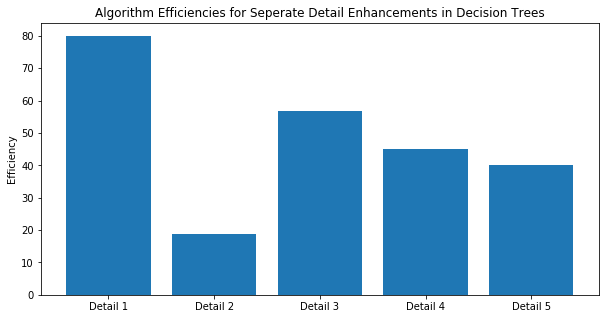

In [6]:
# go through each possible detail tests and see how they affect the decision trees
%reset -f
%matplotlib inline
from EKG_project_machine import data_hold
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
log_two = 12
dwt_scale = 5
peak = 0.6
array_size = 8
def effic(percent_dead,percent_miss,percent_perfect):
    return(1-(percent_miss+percent_dead)/percent_perfect)*100

wavelet = 'db38' 
results = []
object_holders = [0]
scales = [1,2,3,4,5]

for i in scales:
    test_scale = i
    
    # make an array of objects and run all of the base code
    object_holders.append(data_hold())
    object_holders[i].get_data(samps = log_two)
    object_holders[i].dwt_analysis(scale = dwt_scale, wavelet = wavelet)
    object_holders[i].dwt_mod_single(i)
    object_holders[i].dwt_synthesis(wavelet = wavelet)
    object_holders[i].get_heart_rate(log_two,peak)
    object_holders[i].get_q_r_ratio(array_size)
    object_holders[i].get_time_interval(array_size)
    object_holders[i].set_up_machine_learn()
    object_holders[i].run_machine_tests()
    
    # analyze the results for the decision tree
    count = 0
    death_count = 0 
    happy_count = 0
    missfire_count = 0
    for j in range(len(object_holders[i].type_learn)):
        count += 1
        if object_holders[i].predict4[j] == object_holders[i].type_learn[j]:
            happy_count +=1
        elif object_holders[i].predict4[j] == 1 and object_holders[i].type_learn[j] == 0:
            death_count += 1
        elif object_holders[i].predict4[j] == 0 and object_holders[i].type_learn[j] == 1:
            missfire_count +=1
    
    # calculate efficiencies and store them
    percent_dead = death_count / count
    percent_miss = missfire_count / count
    percent_perfect = happy_count / count
    eff_tree = effic(percent_dead,percent_miss,percent_perfect)
    results.append(eff_tree)
    
plt.figure()
plt.bar(['Detail 1','Detail 2','Detail 3','Detail 4','Detail 5'],results)
plt.title('Algorithm Efficiencies for Seperate Detail Enhancements in Decision Trees')
plt.ylabel('Efficiency')
plt.show()

#### Clearly the detail enhancement of the first (longest time scale) detail vector allows for the most accurate characterization, so from now on this wavelet analysis will be used.

## Different Wavelet Testing (Through a Decision Tree)

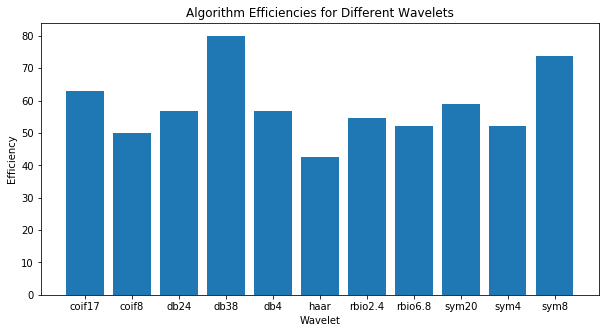

In [7]:
# This section will do the same testing as above, but with the a few different wavelets
%reset -f
%matplotlib inline
from EKG_project_machine import data_hold
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
def effic(percent_dead,percent_miss,percent_perfect):
    return(1-(percent_miss+percent_dead)/percent_perfect)*100

log_two = 12
wavelet = 'db38'
peak = 0.6
array_size = 8
results = []
wavelets = ['db38','haar','sym4','sym8','sym20','db4','db24','rbio6.8','rbio2.4','coif17','coif8']
detail = 1
dwt_scale = 5
object_holders = []

for i in range(len(wavelets)):
    wavelet = wavelets [i]
    # make an array of objects and run all of the base code
    object_holders.append(data_hold())
    object_holders[i].get_data(samps = log_two)
    object_holders[i].dwt_analysis(scale = dwt_scale, wavelet = wavelet)
    object_holders[i].dwt_mod_single(detail)
    object_holders[i].dwt_synthesis(wavelet = wavelet)
    object_holders[i].get_heart_rate(log_two,peak)
    object_holders[i].get_q_r_ratio(array_size)
    object_holders[i].get_time_interval(array_size)
    object_holders[i].set_up_machine_learn()
    object_holders[i].run_machine_tests()
    
    # analyze the results for the decision tree
    count = 0
    death_count = 0 
    happy_count = 0
    missfire_count = 0
    for j in range(len(object_holders[i].type_learn)):
        count += 1
        if object_holders[i].predict4[j] == object_holders[i].type_learn[j]:
            happy_count +=1
        elif object_holders[i].predict4[j] == 1 and object_holders[i].type_learn[j] == 0:
            death_count += 1
        elif object_holders[i].predict4[j] == 0 and object_holders[i].type_learn[j] == 1:
            missfire_count +=1
    
    # calculate efficiencies and store them
    percent_dead = death_count / count
    percent_miss = missfire_count / count
    percent_perfect = happy_count / count
    eff_tree = effic(percent_dead,percent_miss,percent_perfect)
    results.append(eff_tree)
    
plt.figure()
plt.bar(wavelets,results)
plt.title('Algorithm Efficiencies for Different Wavelets')
plt.ylabel('Efficiency')
plt.xlabel('Wavelet')
plt.show()

#### The db38 wavelet at a level 1 detail enhancement shows the best performance. This is not suprising because Daubuchies wavelets have been shown to be able to detect extremely small abnormalities in a range of signals.

## Final Testing for Optimized Wavelet vs. Raw Data

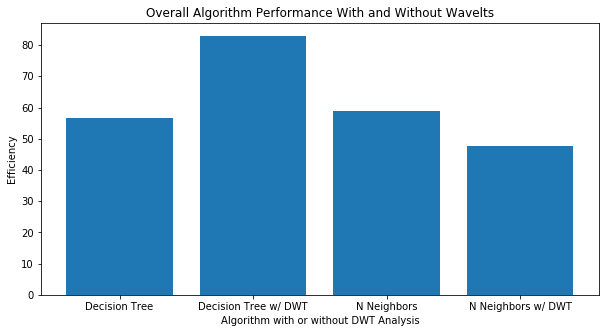

In [8]:
# This section will do the same testing as above, but with the a few different wavelets
# %reset -f
%matplotlib inline
from EKG_project_machine import data_hold
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
def effic(percent_dead,percent_miss,percent_perfect):
    return(1-(percent_miss+percent_dead)/percent_perfect)*100

results = []
tests = ['Decision Tree w/ DWT','Decision Tree','N Neighbors','N Neighbors w/ DWT']
detail = 1
dwt_scale = 5
neighbors = 10
log_two = 12
peak = 0.6
array_size = 8
object_holders = []

for i in range(len(tests)):
    wavelet = 'db38'
    # make an array of objects and run all of the base code
    object_holders.append(data_hold())
    object_holders[i].get_data(samps = log_two)
    if "DWT" in tests[i]:
        object_holders[i].dwt_analysis(scale = dwt_scale, wavelet = wavelet)
        object_holders[i].dwt_mod_single(detail)
        object_holders[i].dwt_synthesis(wavelet = wavelet)
    object_holders[i].get_heart_rate(log_two,peak)
    object_holders[i].get_q_r_ratio(array_size)
    object_holders[i].get_time_interval(array_size)
    object_holders[i].set_up_machine_learn()
    object_holders[i].run_machine_tests()
    
    if "Decision Tree" in tests[i]:
        # analyze the results for the decision tree
        count = 0
        death_count = 0 
        happy_count = 0
        missfire_count = 0
        for j in range(len(object_holders[i].type_learn)):
            count += 1
            if object_holders[i].predict4[j] == object_holders[i].type_learn[j]:
                happy_count +=1
            elif object_holders[i].predict4[j] == 1 and object_holders[i].type_learn[j] == 0:
                death_count += 1
            elif object_holders[i].predict4[j] == 0 and object_holders[i].type_learn[j] == 1:
                missfire_count +=1

        # calculate efficiencies and store them
        percent_dead = death_count / count
        percent_miss = missfire_count / count
        percent_perfect = happy_count / count
        eff = effic(percent_dead,percent_miss,percent_perfect)
        results.append(eff)
    
    elif "N Neighbors" in tests[i]:
        # analyze the results for the decision tree
        count = 0
        death_count = 0 
        happy_count = 0
        missfire_count = 0
        for j in range(len(object_holders[i].type_learn)):
            count += 1
            if object_holders[i].predict1[j] == object_holders[i].type_learn[j]:
                happy_count +=1
            elif object_holders[i].predict1[j] == 1 and object_holders[i].type_learn[j] == 0:
                death_count += 1
            elif object_holders[i].predict1[j] == 0 and object_holders[i].type_learn[j] == 1:
                missfire_count +=1

        # calculate efficiencies and store them
        percent_dead = death_count / count
        percent_miss = missfire_count / count
        percent_perfect = happy_count / count
        eff = effic(percent_dead,percent_miss,percent_perfect)
        results.append(eff)
    
plt.figure()
plt.bar(tests,results)
plt.title('Overall Algorithm Performance With and Without Wavelts')
plt.ylabel('Efficiency')
plt.xlabel('Algorithm with or without DWT Analysis')
plt.show()

#### Clearly, the decision tree algorithm helped with the discrete wavelet transform was the best performing algorithm and offers a significant improvement over the raw data option.

## Analysis of Results: 

Four sets of EKG data, known healthy, known unheathy, unknown heathy, and unknown unhealthy, were utilized to determine which machine learning algorithm in combination with a wavelet transform created the most accurate catagorization of abnormal and normal heart rhythms. Initial testing on the data determined that a detail enhancement on the wavelet was a better wavelet modification than that of a threshold modification. Further inspection on the detail enhancement, demonstrated the first detail enhancement provided around an 80% efficiency of feature extraction, around 20% higher efficiency then the next highest efficiency, given by detail number 3. Thus the remaining testing of the wavlet transforms involved a detail 1 enhancement only.

Testing the four machine learning algorithms, Decision Trees, Nearest Neighbors, Logistic Regression, and Naïve Bayes without using the raw data revealed that both decision trees and nearest neighbors sorted the the unknown healthy and unhealthy rhythms with an effciencies nearing 60%. In comparison, the Logistic Regression and Naïve Bayes operated at around 40% and 20% respectively. Thus, the Logistic Regression and the Naïve Bayes algorithm were not further tested with wavelets. From testing multiple wavelets with a detail 1 enhancement on the Decision trees algorithm, suggested that a DB38 wavelet would give the highest increase in efficiency for the EKG sorting. 

The final tests of Decision Trees and Nearest Neighbors-4 with a DB38 wavelet modified with a detail 1 enhancement determined that the Decision Trees algorithm responded with the best efficiency to the wavelet transform. without the transform the performance of the decision tree was around 60%. With the addition of the wavelet, this value was closer to 80%. This significant increase in performance was most likely due to the wavelet analysis allowing for more consistent measurement of signal traits. It is interesting to note that the Nearest Neighbors algorithm showed an approximate 10% decrease in performance when the wavelet was applied. This is most likely because the wavelet analysis homogenized the sample to a level that was hard to detect using nearest neighbors.

# Section 5: Conclusion and Summary

   Currently the algorithm examines both a wavelet modified and unmodified EKG signals for four characteristics of an EKG signal, all of which pertain to the QRS segment of the signal. The categorization of the signals as healthy or unhealthy occurs through four types of machine learning: Decision Trees, Nearest Neighbors, Naïve Bayes, and Logistic Regression. Running the algorithm on a set of learning data revealed that the highest-level wavelet, DB38, with a detail 1 enhancement in combination with the Decision Tree algorithm resulted in the highest performance of categorizing healthy and unhealthy rhythms. The wavelet based Decision Tree algorithm operated near an 80% preformance efficiency, minimizing both the type 1 and type 2 errors while maximizing it percent of correct sorting. This efficiency, for Decision Trees, was around 20% higher than when no wavelet modification of EKG signal was used. While the 80% efficiency was the largest performance efficiency out of all the wavlet and machine learning algorithm combinations, an 80% efficient machine readout still warrants the need for human review of the EKG readouts.
   
   Future additions to the algorithm could include the examination of the EKG readouts for additional characteristics such as the PR interval and the shape of the ST segment. Also, supplying the algorithm with additional data likely will improve the accuracy of the machine and call for the investigation of a neural network machine learning algorithm as a possibility for improving efficiency. Developing a more accurate machine learning algorithm for characterization of EKG signals will allow not only for autonomic detection of unhealthy heart rhythms but also increase the amount of EKG data that can be analyzed. The  future of EKG testing is dependent on rate and accuracy at a computer algorithm can interpret the outputed data. In the hospital, such an algorithm would eliminate the need for monitor watchers while also hopefully minimize the sounding of unnecessary alarms. 
   
   
   

# Section 6: Appendicies

# Section 7: Statement of Contributions


Clay: 
       
       Development and implementation of the wavelet and machine learning algorithms.

       Writing of the theortical development of the machine learning and the wavelet transforms.



Claire: 

        Gathering the EKG data from physionet.

        Understanding the biological concept of the EKG as well as interpretation of the EKG. 
        
        Determining suitable traits for the machine learning algorithm to use for chracterization.
        
        Writing of the Summary and Conclusion.
        
##### I hearby acknowledge that this statement of contributions is accurate and this electronic signature is my own. 

Signed: Clay Elmore       Date: 04/03/18

Signed: Claire Lo         Date: 04/03/18